# <span style="color:green"> Numerical Simulation Laboratory </span>
## <span style="color:brown"> Python Exercise 11 </span>
## <span style="color:orange"> Keras - Neural Network regression </span>

### Overview 

In this notebook our task will be to perform machine learning regression on noisy data with a Neural Network (NN).

We will explore how the ability to fit depends on the structure of the NN. The goal is also to build intuition about why prediction is difficult.

### The Prediction Problem

Consider a probabilistic process that gives rise to labeled data $(x,y)$. The data is generated by drawing samples from the equation

$$
    y_i= f(x_i) + \eta_i,
$$

where $f(x_i)$ is some fixed, but (possibly unknown) function, and $\eta_i$ is a Gaussian, uncorrelate noise variable such that

$$
\langle \eta_i \rangle=0 \\
\langle \eta_i \eta_j \rangle = \delta_{ij} \sigma
$$

We will refer to the $f(x_i)$ as the **true features** used to generate the data. 

To make predictions, we will consider a NN that depends on its parameters, weights and biases. The functions that the NN can model respresent the **model class** that we are using to try to model the data and make predictions.

To learn the parameters of the NN, we will train our models on a **training data set** and then test the effectiveness of the NN on a *different* dataset, the **validation data set**. The reason we must divide our data into a training and test dataset is that the point of machine learning is to make accurate predictions about new data we have not seen.

To measure our ability to predict, we will learn our parameters by fitting our training dataset and then making predictions on our test data set. One common measure of predictive  performance of our algorithm is to compare the predictions,$\{y_j^\mathrm{pred}\}$, to the true values $\{y_j\}$. A commonly employed measure for this is the sum of the mean square-error (MSE) on the test set:
$$
MSE= \frac{1}{N_\mathrm{test}}\sum_{j=1}^{N_\mathrm{test}} (y_j^\mathrm{pred}-y_j)^2
$$

We will try to get a qualitative picture by examining plots on validation and training data.

### Linear fit

We start by considering the very simple case:
$$
f(x)=2x+1
$$

Let's start defining the parameters of an ideal linear function which we are going to predict through a neural network regression

In [5]:
# target parameters of f(x) = m*x + b
m = 2 # slope
b = 1 # intersect

Now let's generate a set of input data which will slightly deviate from our ideal behaviour using a random noise (that actually is set to zero):

In [6]:
import numpy as np

# generate training inputs
np.random.seed(0)
x_train = np.random.uniform(-1, 1, 500)
x_valid = np.random.uniform(-1, 1, 50)
x_valid.sort()
y_target = m * x_valid + b # ideal (target) linear function

sigma = 0.0 # noise standard deviation, for the moment it is absent
y_train = np.random.normal(m * x_train + b, sigma) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(m * x_valid + b, sigma)

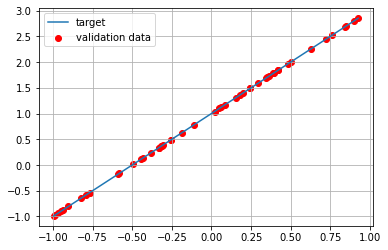

In [7]:
# plot validation and target dataset
import matplotlib.pyplot as plt
plt.plot(x_valid, y_target, label='target')
plt.scatter(x_valid, y_valid, color='r', label='validation data')
plt.legend()
plt.grid(True)
plt.show()

If you remember how a single node of a neural network works, you can easily spot that **just a single neuron can make the job**. So let's start using a simple Sequential model with just one layer on one neuron only!

In [9]:
# compose the NN model
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects

model = tf.keras.Sequential()
model.add(Dense(1, input_shape=(1,)))

# compile the model choosing optimizer, loss and metrics objects
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])

In [10]:
# get a summary of our composed model
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


We are now going to train our model, that is we feed the neuron with the set of training pair x, y_train from which the optimizer will find the best weights to minimize the Mean Square Error loss function (out linear regression function).

In [11]:
# fit the model using training dataset
# over 10 epochs of 32 batch size each
# report training progress against validation data
history = model.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=30,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid))

Epoch 1/30
16/16 [==============================] - 1s 33ms/step - loss: 2.3434 - mse: 2.3434 - val_loss: 1.7079 - val_mse: 1.7079
Epoch 2/30
16/16 [==============================] - 0s 6ms/step - loss: 1.6763 - mse: 1.6763 - val_loss: 1.2497 - val_mse: 1.2497
Epoch 3/30
16/16 [==============================] - 0s 6ms/step - loss: 1.2386 - mse: 1.2386 - val_loss: 0.9481 - val_mse: 0.9481
Epoch 4/30
16/16 [==============================] - 0s 7ms/step - loss: 0.9436 - mse: 0.9436 - val_loss: 0.7334 - val_mse: 0.7334
Epoch 5/30
16/16 [==============================] - 0s 8ms/step - loss: 0.7304 - mse: 0.7304 - val_loss: 0.5756 - val_mse: 0.5756
Epoch 6/30
16/16 [==============================] - 0s 7ms/step - loss: 0.5724 - mse: 0.5724 - val_loss: 0.4556 - val_mse: 0.4556
Epoch 7/30
16/16 [==============================] - 0s 8ms/step - loss: 0.4521 - mse: 0.4521 - val_loss: 0.3628 - val_mse: 0.3628
Epoch 8/30
16/16 [==============================] - 0s 8ms/step - loss: 0.3593 - mse: 0.3

By looking at weights and biases we can see if the linear fit was successfull: $w_1$ represents the angular coefficient, $b$ the intercept.

In [12]:
# return weights and biases
model.get_weights()

[array([[1.9133663]], dtype=float32), array([0.99912953], dtype=float32)]

In [13]:
# evaluate model
score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

2/2 [==============================] - 0s 11ms/step - loss: 0.0024 - mse: 0.0024

Test loss: 0.0023870356380939484
Test accuracy: 0.0023870356380939484


In [14]:
# evaluate model with the exact curve
score = model.evaluate(x_valid, y_target, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

2/2 [==============================] - 0s 7ms/step - loss: 0.0024 - mse: 0.0024

Test loss: 0.0023870356380939484
Test accuracy: 0.0023870356380939484


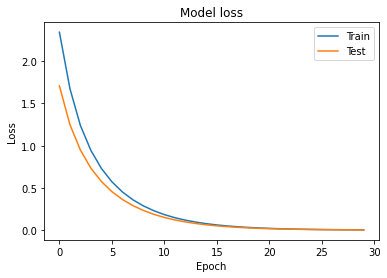

In [15]:
# look into training history
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

4/4 [==============================] - 0s 3ms/step


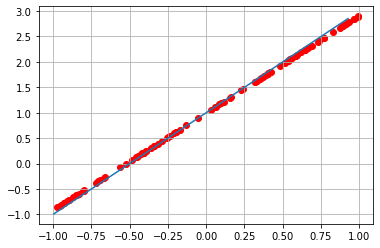

In [16]:
x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = model.predict(x_predicted)
plt.scatter(x_predicted, y_predicted,color='r')
plt.plot(x_valid, y_target)
plt.grid(True)
plt.show()

### Exercise 11.1

In order to make practice with NN, explore how does the previous linear regression depend on the number of epochs, $N_{\mathrm{epochs}}$, the number of data points $N_{\mathrm{train}}$ and on the noise $\sigma$. Try to improve the previous result operating on these parameters.

### Esercizio 11.1 - Soluzione proposta

Si è allenata la rete neurale con diversi numeri di epoche $N_{epochs}$, di dati di _training_ $N_{train}$ e valori di rumore $\sigma$. Si è osservato che, in generale, l'aumento di $N_{epochs}$ e di $N_{train}$ ha portato a una riduzione della funzione di costo (ossia dell'errore quadratico medio, per il caso in esame); la crescita di $\sigma$ ha causato invece un peggioramento del _fit_, tuttavia la _NN_ è riuscita a predirre dati corretti anche in tal caso.

Di seguito sono presentati l'allenamento della rete neurale, i parametri $m$ e $b$ calcolati dal modello e l'andamento dei dati predetti per:
- $N_{epochs}$ = 50
- $N_{train}$ = 500
- $\sigma$ = 0.25

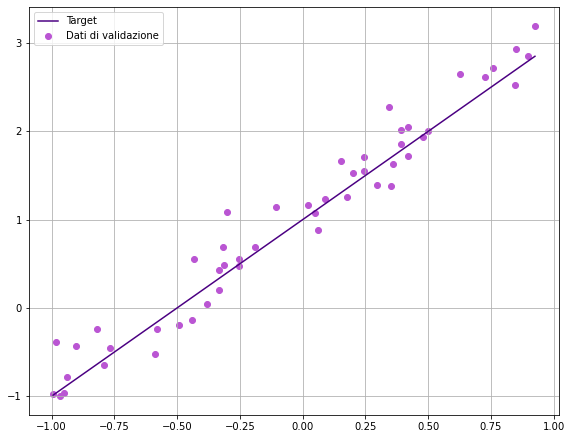

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_41 (Dense)            (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/50
16/16 [==============================] - 1s 22ms/step - loss: 2.0316 - mse: 2.0316 - val_loss: 1.6265 - val_mse: 1.6265
Epoch 2/50
16/16 [==============================] - 0s 7ms/step - loss: 1.4545 - mse: 1.4545 - val_loss: 1.1810 - val_mse: 1.1810
Epoch 3/50
16/16 [==============================] - 0s 7ms/step - loss: 1.0741 - mse: 1.0741 - val_loss: 0.8915 - val_mse: 0.8915
Epoch 4/50
16/16 [==============================] - 0s 7ms/step - loss: 0.8221 - mse: 0.8221 - val_loss: 0.6912 - val_mse: 0.6912
Epoch 5/50
16/16 [============

In [131]:
# target parameters of f(x) = m*x + b
m = 2 # slope
b = 1 # intersect

import numpy as np

# generate training inputs
np.random.seed(0)
x_train = np.random.uniform(-1, 1, 500)
x_valid = np.random.uniform(-1, 1, 50)
x_valid.sort()
y_target = m * x_valid + b # ideal (target) linear function

sigma = 0.25 # noise standard deviation
y_train = np.random.normal(m * x_train + b, sigma) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(m * x_valid + b, sigma)

# plot validation and target dataset
import matplotlib.pyplot as plt
plt.figure(figsize=(9.5, 7.5))
plt.plot(x_valid, y_target, label='Target', color = 'indigo')
plt.scatter(x_valid, y_valid, label='Dati di validazione', color = 'mediumorchid')
plt.legend()
plt.grid(True)
plt.show()

# compose the NN model
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects

model = tf.keras.Sequential()
model.add(Dense(1, input_shape=(1,)))

# compile the model choosing optimizer, loss and metrics objects
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])

# get a summary of our composed model
model.summary()

# fit the model using training dataset
# over 10 epochs of 32 batch size each
# report training progress against validation data
history = model.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=50,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid))

In [132]:
# return weights and biases
model.get_weights()

[array([[2.018349]], dtype=float32), array([0.9720546], dtype=float32)]

In [133]:
# evaluate model
score = model.evaluate(x_valid, y_valid, batch_size=10, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

5/5 [==============================] - 0s 4ms/step - loss: 0.0698 - mse: 0.0698

Test loss: 0.06982796639204025
Test accuracy: 0.06982796639204025


In [134]:
# evaluate model
score = model.evaluate(x_valid, y_target, batch_size=10, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

5/5 [==============================] - 0s 4ms/step - loss: 9.4203e-04 - mse: 9.4203e-04

Test loss: 0.0009420308633707464
Test accuracy: 0.0009420308633707464


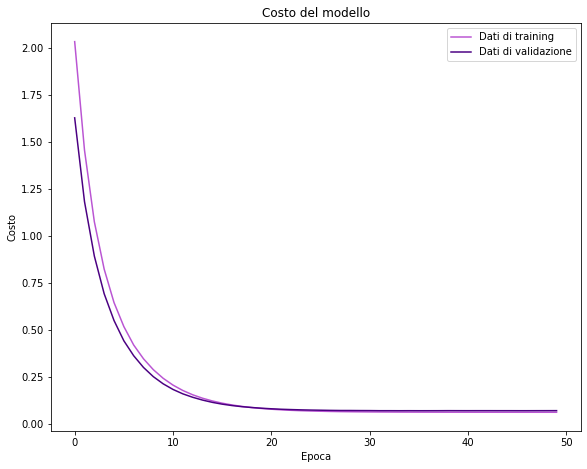

In [135]:
# look into training history
# Plot training & validation loss values
plt.figure(figsize=(9.5, 7.5))
plt.plot(history.history['loss'], color='mediumorchid')
plt.plot(history.history['val_loss'], color='indigo')
plt.title('Costo del modello')
plt.ylabel('Costo')
plt.xlabel('Epoca')
plt.legend(['Dati di training', 'Dati di validazione'], loc='best')
plt.show()

4/4 [==============================] - 0s 3ms/step


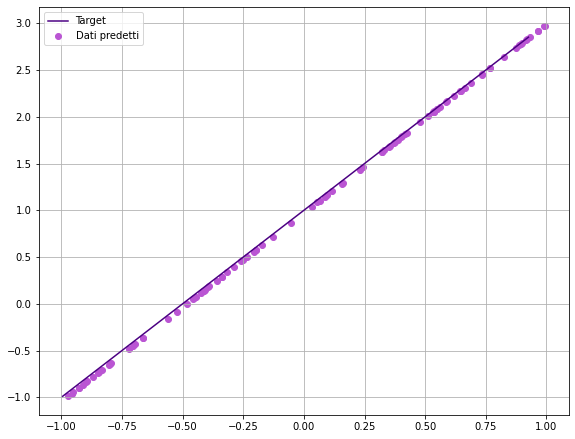

In [136]:
x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = model.predict(x_predicted)
plt.figure(figsize=(9.5, 7.5))
plt.scatter(x_predicted, y_predicted,color='mediumorchid', label = 'Dati predetti')
plt.plot(x_valid, y_target, color ='indigo', label = 'Target')
plt.legend()
plt.grid(True)
plt.show()

### Exercise 11.2

Try to extend the model to obtain a reasonable fit of the following polynomial of order 3:

$$
f(x)=4-3x-2x^2+3x^3
$$
for $x \in [-1,1]$.

Find good (& reasonable) choices for:

- the number of layers
- the number of neurons in each layer
- the activation function
- the optimizer
- the loss function
  
Check your NN model by seeing how well your fits predict newly generated test data (including on data outside the range you fit. How well do your NN do on points in the range of $x$ where you trained the model? How about points outside the original training data set? 
Summarize what you have learned about the relationship between model complexity (number of parameters), goodness of fit on training data, and the ability to predict well.

### Esercizio 11.2 - Soluzione proposta

Si è creata una rete neurale in grado di modellizzare $f(x) = 4 -3x -2x^2 + 3x^3$ in modo analogo a quanto fatto per la funzione lineare nell'**Esercizio 11.1**, con:
- $N_{epochs} = 80 $
- $N_{train} = 2500$
- $\sigma = 0.25$

A differenza della _NN_ usata nell'**Esercizio 11.1**, la rete in esame presenta più di un _layer_ neurale: ciò è utile per poter predire più di un parametro.

Si è notato che l'aumento del rumore ha portato a un peggioramento del fit, analogo a quello osservato per la retta.

La _NN_ è risultata migliore sia al crescere di $N_{epochs}$ e $N_{train}$, sia al crescere del numero di strati e di neuroni da cui è costituita. Come funzione di attivazione si è scelta _Leaky ReLU_.

Di seguito sono presentati l'allenamento della rete neurale e l'andamento dei dati predetti.

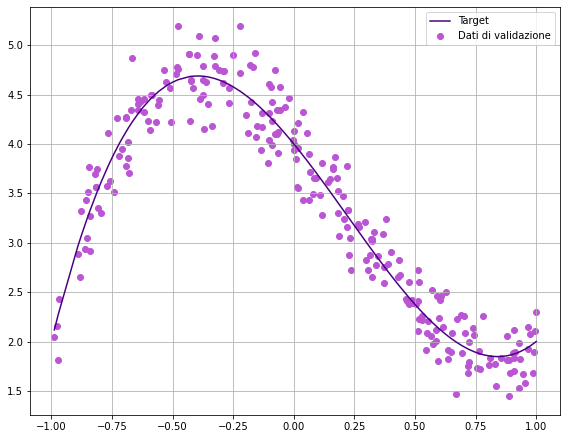

In [137]:
# target parameters of f(x) = a + b*x + c*x^2 + d*x^3
a = 4
b = -3
c = -2
d = 3
import numpy as np

N_train = 2500 #fissato il numero di dati di training e di test, entrambi più alti rispetto alla funzione lineare
N_valid = 250
# generate training inputs
np.random.seed(0)
x_train = np.random.uniform(-1, 1, N_train)
x_valid = np.random.uniform(-1, 1, N_valid)
x_valid.sort()
y_target = a + b * x_valid + c * x_valid**2 + d * x_valid**3 # ideal (target) polinomial function

sigma = 0.25 #dati "sporcati" con un rumore
y_train = np.random.normal(a + b * x_train + c * x_train**2 + d * x_train**3 , sigma) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(a + b * x_valid + c * x_valid**2 + d * x_valid**3, sigma)

# plot validation and target dataset
import matplotlib.pyplot as plt
plt.figure(figsize=(9.5, 7.5))
plt.plot(x_valid, y_target, color='indigo', label='Target')
plt.scatter(x_valid, y_valid, color='mediumorchid', label='Dati di validazione')
plt.legend()
plt.grid(True)
plt.show()


In [138]:
# compose the NN model
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects

model = tf.keras.Sequential() #il comando crea una sequenza di livelli che è possibile aumentare uno a uno
model.add(Dense(32, activation='LeakyReLU', input_shape=(1,))) #si aggiunge al modello un livello denso, i.e. un livello in cui ciascun neurone è connesso a ogni neurone del livello precedente. Il primo argomento si riferisce al numero di neuroni nel livello, il secondo al tipo di attivazione, il terzo alla forma dei dati di input; quest'ultima è (1, ) poiché la funzione di cui vogliamo ricavare i parametri dipende dall'unica variabile indipendente x 
model.add(Dense(4, activation='LeakyReLU'))
model.add(Dense(1)) #si aggiunge un layer con un solo neurone per produrre l'output

model.compile(optimizer='sgd', loss='mse', metrics=['mse']) #si sceglie lo stochastic gradient descent come algoritmo di ottimizzazione e l'errore quadratico medio come funzione di costo da minimizzare

# get a summary of our composed model
model.summary()

# fit the model using training dataset
# over 10 epochs of 32 batch size each
# report training progress against validation data
history = model.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=80,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid))

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_42 (Dense)            (None, 32)                64        
                                                                 
 dense_43 (Dense)            (None, 4)                 132       
                                                                 
 dense_44 (Dense)            (None, 1)                 5         
                                                                 
Total params: 201 (804.00 Byte)
Trainable params: 201 (804.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/80
79/79 [==============================] - 1s 7ms/step - loss: 1.3177 - mse: 1.3177 - val_loss: 0.5078 - val_mse: 0.5078
Epoch 2/80
79/79 [==============================] - 0s 4ms/step - loss: 0.5881 - mse: 0.5881 - val_loss: 0.4961 - val_mse: 0.4961
Epoch 3/80
79/79 [=

In [139]:
#Valutato il modello usando il dataset di validazione
score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=1)

#Stampati i risultati della funzione di costo e della metrica del modello
print()
print('Model vs Valid')
#print(y_valid)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

score = model.evaluate(x_valid, y_target, batch_size=32, verbose=1)

print()
print('Model vs Target')
#print(y_target)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

8/8 [==============================] - 0s 5ms/step - loss: 0.0627 - mse: 0.0627

Model vs Valid
Test loss: 0.06272479891777039
Test accuracy: 0.06272479891777039
8/8 [==============================] - 0s 3ms/step - loss: 0.0031 - mse: 0.0031

Model vs Target
Test loss: 0.0031211271416395903
Test accuracy: 0.0031211271416395903


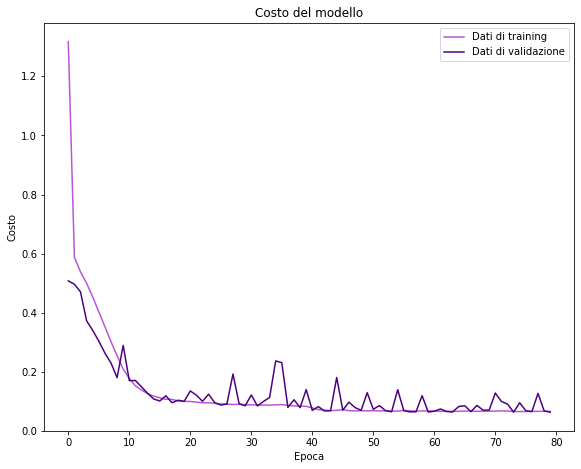

In [140]:
# look into training history
# Plot training & validation loss values
plt.figure(figsize=(9.5, 7.5))
plt.plot(history.history['loss'], color='mediumorchid')
plt.plot(history.history['val_loss'], color='indigo')
plt.title('Costo del modello')
plt.ylabel('Costo')
plt.xlabel('Epoca')
plt.legend(['Dati di training', 'Dati di validazione'], loc='best')
plt.show()

4/4 [==============================] - 0s 3ms/step


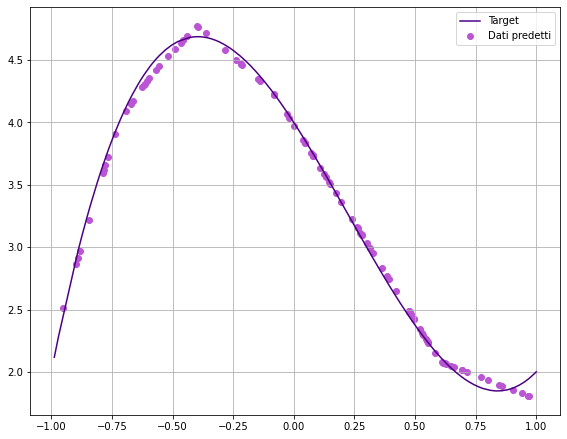

In [141]:
x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = model.predict(x_predicted)
plt.figure(figsize=(9.5, 7.5))
plt.scatter(x_predicted, y_predicted,color='mediumorchid', label = 'Dati predetti')
plt.plot(x_valid, y_target, color = 'indigo', label='Target')
plt.legend()
plt.grid(True)
plt.show()

Nel grafico seguente è presentato l'andamento dei dati predetti al di fuori dell'intervallo di allenamento della rete: si nota che per tali $x$ il modello non riesce a riprodurre accuratamente l'andamento della funzione _target_.

4/4 [==============================] - 0s 5ms/step


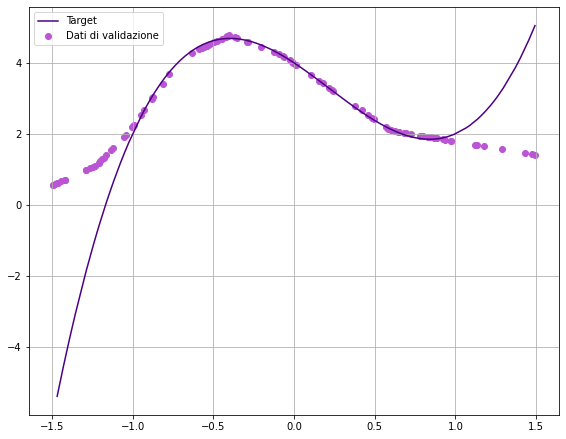

In [142]:
x_valid = np.random.uniform(-1.5, 1.5, N_valid)
x_valid.sort()
y_target = a + b * x_valid + c * x_valid**2 + d * x_valid**3 # ideal (target) polinomial function

x_predicted = np.random.uniform(-1.5, 1.5, 100)
y_predicted = model.predict(x_predicted)

plt.figure(figsize=(9.5, 7.5))
plt.plot(x_valid, y_target, color='indigo', label='Target')
plt.scatter(x_predicted, y_predicted, color='mediumorchid', label='Dati di validazione')
plt.legend()
plt.grid(True)
plt.show()


### Exercise 11.3
  
Try to extend the model to fit a simple trigonometric 2D function such as $f(x,y) = \sin(x^2+y^2)$ in the range $x \in [-3/2,3/2]$ and $y \in [-3/2,3/2]$.

### Esercizio 11.3 - Soluzione proposta

Si è proceduto in modo analogo a quanto fatto nell'**Esercizio 11.2**, con:
- $N_{epochs} = 80 $
- $N_{train} = 5000$
- $\sigma = 0.25$

Si è notato che l'aumento del rumore ha portato a un drastico peggioramento del fit, più notevole rispetto a quello osservato per la funzione lineare e per il polinomio.

La _NN_ è risultata migliore scegliendo come funzione di ottimizzazione _Adam_, che risulta più rapido ed efficiente rispetto allo _Stochastic Gradient Descent_.

Di seguito sono presentati l'allenamento della rete neurale e l'andamento dei dati predetti.

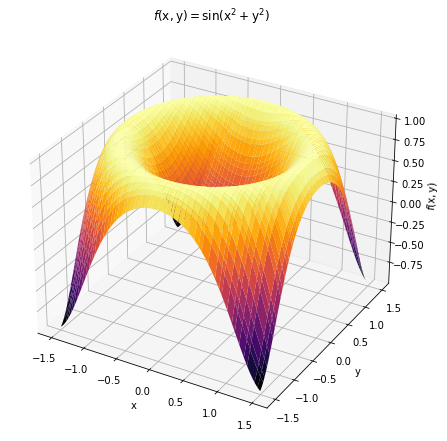

In [143]:
import numpy as np

N_train = 5000 #fissato il numero di dati di training e di test, entrambi più alti rispetto alla funzione lineare
N_valid = 500
# generate training inputs
np.random.seed(0)
x_train = np.random.uniform(-1.5, 1.5, N_train)
y_train = np.random.uniform(-1.5, 1.5, N_train)

x_valid = np.random.uniform(-1.5, 1.5, N_valid)
x_valid.sort()

y_valid = np.random.uniform(-1.5, 1.5, N_valid)
y_valid.sort()

z_target = np.sin(x_valid**2 + y_valid**2) # ideal (target) polinomial function

sigma = 0.25 #dati "sporcati" con un rumore gaussiano
z_train = np.random.normal(np.sin(x_train**2 + y_train**2), sigma) # actual measures from which we want to guess regression parameters
z_valid = np.random.normal(np.sin(x_valid**2 + y_valid**2), sigma)

# plot validation and target dataset
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

# Create a 3D plot
fig = plt.figure(figsize=(7.5, 7.5))
ax = plt.axes(projection='3d')
x, y = np.meshgrid(x_valid, y_valid)
z = np.sin(x**2 + y**2)

# Plot the function surface
ax.plot_surface(x, y, z, cmap='inferno')

# Customize the plot
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('$f(\mathrm{x}, \mathrm{y})$')
ax.set_title('$f(\mathrm{x}, \mathrm{y}) = \sin(\mathrm{x}^2 + \mathrm{y}^2)$')

# Show the plot
plt.show()

In [144]:
# compose the NN model
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects

model = tf.keras.Sequential() #il comando crea una sequenza di livelli che è possibile aumentare uno a uno
model.add(Dense(32, activation='LeakyReLU', input_shape=(2,))) #si aggiunge al modello un livello denso, i.e. un livello in cui ciascun neurone è connesso a ogni neurone del livello precedente. Il primo argomento si riferisce al numero di neuroni nel livello, il secondo al tipo di attivazione, il terzo alla forma dei dati di input; quest'ultima è (2, ) poiché la funzione di cui vogliamo ricavare i parametri dipende dalle variabili indipendenti (x, y) 
model.add(Dense(16, activation='LeakyReLU'))
model.add(Dense(8, activation='LeakyReLU'))
model.add(Dense(1)) #si aggiunge un layer con un solo neurone per produrre l'output

model.compile(optimizer='adam', loss='mse') #si sceglie Adam come algoritmo di ottimizzazione, pocihé esso risulta più rapido ed efficiente  nel caso in esame rispetto allo stochastic gradient descent, e l'errore quadratico medio come funzione di costo da minimizzare

# get a summary of our composed model
model.summary()

# fit the model using training dataset
# over 10 epochs of 32 batch size each
# report training progress against validation data
history = model.fit(x=np.column_stack((x_train, y_train)), y=z_train,
                    batch_size=32, epochs=80,
                    validation_data=(np.column_stack((x_valid, y_valid)), z_valid))

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_45 (Dense)            (None, 32)                96        
                                                                 
 dense_46 (Dense)            (None, 16)                528       
                                                                 
 dense_47 (Dense)            (None, 8)                 136       
                                                                 
 dense_48 (Dense)            (None, 1)                 9         
                                                                 
Total params: 769 (3.00 KB)
Trainable params: 769 (3.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/80
157/157 [==============================] - 2s 5ms/step - loss: 0.2594 - val_loss: 0.3654
Epoch 2/80
157/157 [==============================] - 1

In [145]:
#Valutato il modello usando il dataset di validazione
score = model.evaluate(np.column_stack((x_valid, y_valid)), z_valid, batch_size=32, verbose=1)

#Stampati i risultati della funzione di costo e della metrica del modello
print()
print('Model vs Valid')
print('Test loss:', score)

score = model.evaluate(np.column_stack((x_valid, y_valid)), z_target, batch_size=32, verbose=1)

print()
print('Model vs Target')
print('Test loss:', score)

16/16 [==============================] - 0s 3ms/step - loss: 0.0712

Model vs Valid
Test loss: 0.07122884690761566
16/16 [==============================] - 0s 3ms/step - loss: 0.0042

Model vs Target
Test loss: 0.004175906535238028


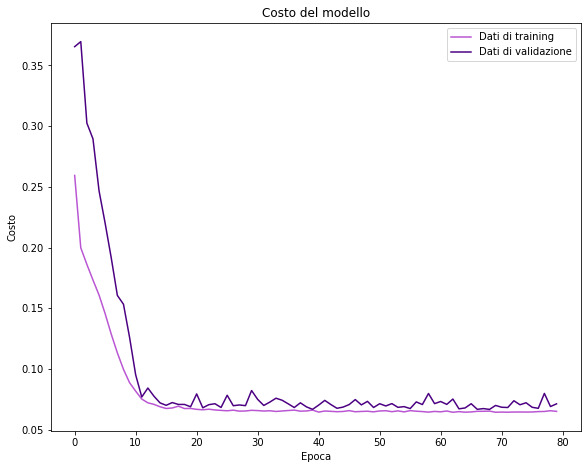

In [146]:
# look into training history
# Plot training & validation loss values
plt.figure(figsize=(9.5, 7.5))
plt.plot(history.history['loss'], color='mediumorchid')
plt.plot(history.history['val_loss'], color='indigo')
plt.title('Costo del modello')
plt.ylabel('Costo')
plt.xlabel('Epoca')
plt.legend(['Dati di training', 'Dati di validazione'], loc='best')
plt.show()

313/313 [==============================] - 1s 3ms/step


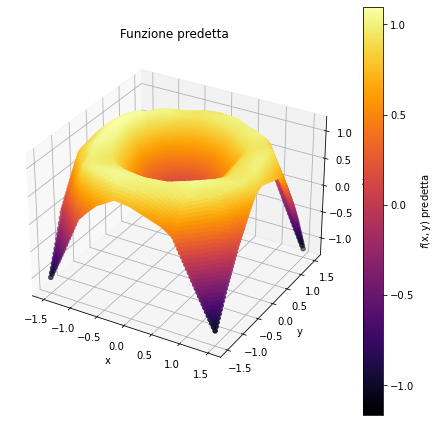

16/16 [==============================] - 0s 3ms/step - loss: 0.0712

Test loss: 0.07122884690761566


In [147]:
# Generate grid points to evaluate the function over the given range
x = np.linspace(-1.5, 1.5, 100)
y = np.linspace(-1.5, 1.5, 100)
x, y = np.meshgrid(x, y)
z = np.sin(x**2 + y**2)

# Flatten the grid points for prediction
x_flat = x.flatten()
y_flat = y.flatten()

# Predict the function values using the trained model
z_pred = model.predict(np.column_stack((x_flat, y_flat)))
#z_pred = z_pred.reshape(x.shape)

# Scatter plot of predicted points with color mapping
fig = plt.figure(figsize=(7.5, 7.5))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(x_flat, y_flat, z_pred, c=z_pred, cmap='inferno')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title('Funzione predetta')

# Add a colorbar to the plot
cbar = fig.colorbar(sc)
cbar.set_label('$f( \mathrm{x}, \mathrm{y})$ predetta')

plt.show()

# Evaluate the model
score = model.evaluate(np.column_stack((x_valid, y_valid)), z_valid, batch_size=32, verbose=1)
print()
print('Test loss:', score)